## 0. Introduction

### a) Goals

### b) Data

We will download geospatial data from a Government of Canada website. Note: this will take time, thus **please do so before the lab**.

- Go to: https://maps.canada.ca/czs/index-en.html
- Click through the slides 1 - 11 for details on the choices and settings.
- On the right side, type in e.g. the postal code. Zoom and pan until you have a suitable map extent (a little larger than what you want to cover, but not too large or your files will be large)
- Under "Select data to be extracted", click on "CanVec" (Canadian vector data)
- Under "Select clipping area", click "Current Map Extent". Click "Ok". Alternatively, you can select "Custom Clipping Area", then "Draw a Rectangle" and draw a rectangle on the map. Make it about the size of last week's map.
- Under "Select options and submit job"
    - Check that the "Extraction zone area" is reasonably small
    - Under "Select one or more theme from the list", check "Lakes and Rivers" and "Transport Network"
    - Under "Output format choice", select "ESRI shapefile"
    - Under "Select a coordinate system", select "NAD83 SCRS (EPSG:4617)
    - Under "Select to clip or not the data, select "Yes"
    - Under "Select the scale of the data, select "1/50 000" (unless your area is huge)
    - Provide your email address (where the download link will be sent)
    - click "Submit"
    
When the data are ready, you will receive an email with a download link. The data will remain available for download for **five days** only! 

In R, it is possible to import data from a URL. However, to prevent the data from being downloaded multiple times when you rerun the code, and to upload to the JupyterHub only the files that we need, please do the following:

- Download the data to your OneDrive or local computer.
- Unzip the archive.
- Navigate to the folder `ESRISHAPE`, and within that, to the folder `canvec_210911_292092` or similar
- Inside this folder, there are many files that belong to different ESRI shapefiles, just like we created one last week (only that each one here has seven component files, a few more optional ones than we created).
- Now go to the JupyterHub and create a folder "canvec".
- Open that folder.
- **From within the "canvec" folder**, please upload all files from the folder `canvec_210911_292092` (or similar)

### c) R packages

In [1]:
library(sf)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1



## 1. Import road segments into an `sf` object

### a) Import file

Here we use the function `st_read` from the package `sf` to import the shapefile "road_segment_1" (with its different component files) from the folder "canvec" into an R object `road_segment_1`. 

In [2]:
road_segment_1 <- sf::st_read("canvec", layer="road_segment_1")

Reading layer `road_segment_1' from data source `/home/wagnerh1/canvec' using driver `ESRI Shapefile'
Simple feature collection with 24254 features and 117 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: -79.49682 ymin: 43.60246 xmax: -79.3015 ymax: 43.75543
Geodetic CRS:  GCS_North_American_1983_CSRS98


That was easy! That's why ESRI Shapefiles are often used for sharing spatial data.

**Questions:** What does this summary tell you about the dataset? 

- How many road segments and how many attribute variables are there?
- What is the data type: points, lines, or polygons? Where does it tell you that?
- Has a projection been defined? If so, where do you think R found it? Is it the same as we used last time?

### b) Plot geometry or attribute data

Check the names of the attribute data (variables) with the code below: there are many!

We will be using the following:

- `rdcls_en`: road class (i.e., category) in English

In [3]:
names(road_segment_1)

[1] "feature_id" "datemin"    "datemax"    "haccmin"    "haccmax"   
  [6] "cloper"     "cloper_en"  "cloper_fr"  "exnum"      "pd"        
 [11] "pd_en"      "pd_fr"      "rdjuri_en"  "rdjuri_fr"  "isnathi"   
 [16] "isnathi_en" "isnathi_fr" "istrhi"     "istrhi_en"  "istrhi_fr" 
 [21] "numlanes"   "rdcls"      "rdcls_en"   "rdcls_fr"   "geobase_id"
 [26] "rtenam1_en" "rtenam2_en" "rtenam3_en" "rtenam4_en" "rtenam1_fr"
 [31] "rtenam2_fr" "rtenam3_fr" "rtenam4_fr" "rdsegnamen" "rdsegnamfr"
 [36] "rtenum1"    "rtenum2"    "rtenum3"    "sprest"     "surfdsc"   
 [41] "surfdsc_en" "surfdsc_fr" "ispaved"    "ispaved_en" "ispaved_fr"
 [46] "tdirect"    "tdirect_en" "tdirect_fr" "ofmunquadl" "ofmunquadr"
 [51] "offpnaml"   "offpnamr"   "offptypl"   "offptypr"   "ofdirprel" 
 [56] "ofdirprer"  "ofdirsufl"  "ofdirsufr"  "ofstrartl"  "ofstrartr" 
 [61] "ofstrbodyl" "ofstrbodyr" "ofstrtyprl" "ofstrtyprr" "ofstrtysul"
 [66] "ofstrtysur" "ofstrnacol" "ofstrnacor" "ofstrnaml"  "ofstrnamr" 
 [71] "hnumfl"     "hnumfsufl"  "hnumftl"    "hnumftl_en" "hnumftl_fr"
 [76] "hnumll"     "hnumlsufl"  "hnumltl"    "hnumltl_en" "hnumltl_fr"
 [81] "nummetl"    "nummetl_en" "nummetl_fr" "sysindl"    "sysindl_en"
 [86] "sysindl_fr" "adddifgl"   "adddifglen" "adddifglfr" "hnumfr"    
 [91] "hnumfsufr"  "hnumftr"    "hnumftr_en" "hnumftr_fr" "hnumlr"    
 [96] "hnumlsufr"  "hnumltr"    "hnumltr_en" "hnumltr_fr" "nummetr"   
[101] "nummetr_en" "nummetr_fr" "sysindr"    "sysindr_en" "sysindr_fr"
[106] "adddifgr"   "adddifgren" "adddifgrfr" "rdstrugeid" "rdstunamen"
[111] "rdstunamfr" "rdstudsc"   "rdstudscen" "rdstudscfr" "map_sel"   
[116] "map_sel_en" "map_sel_fr" "geometry"

Let's plot the geometry of the road segments (i.e., plot the lines without visualizing any attribute data).

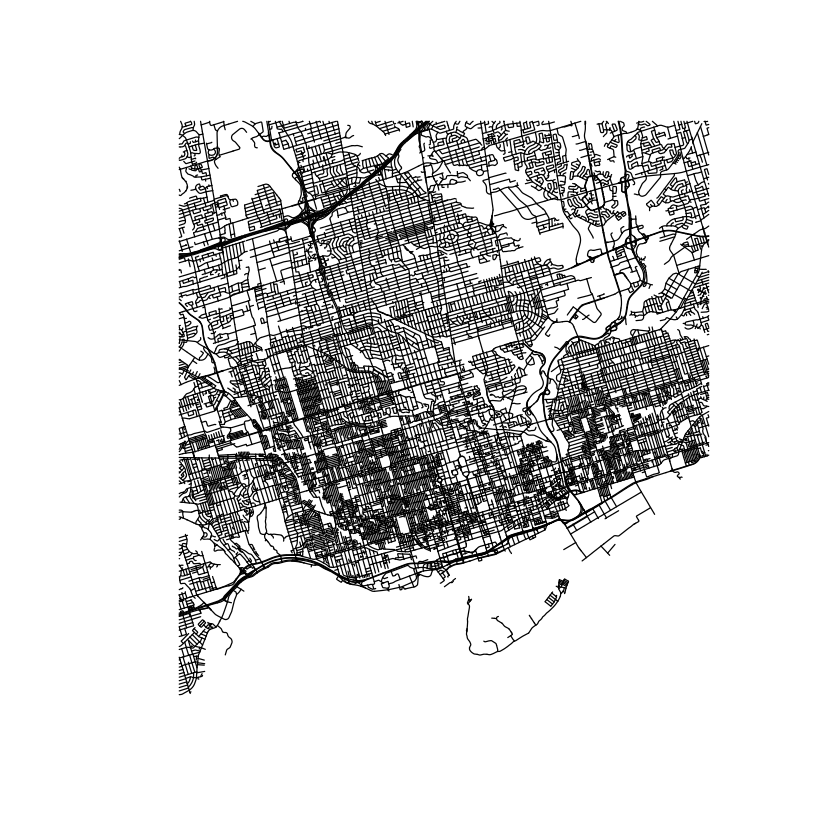

In [4]:
plot(sf::st_geometry(road_segment_1))

Nice! Now let's visualize the attribute "rdcls_en". 

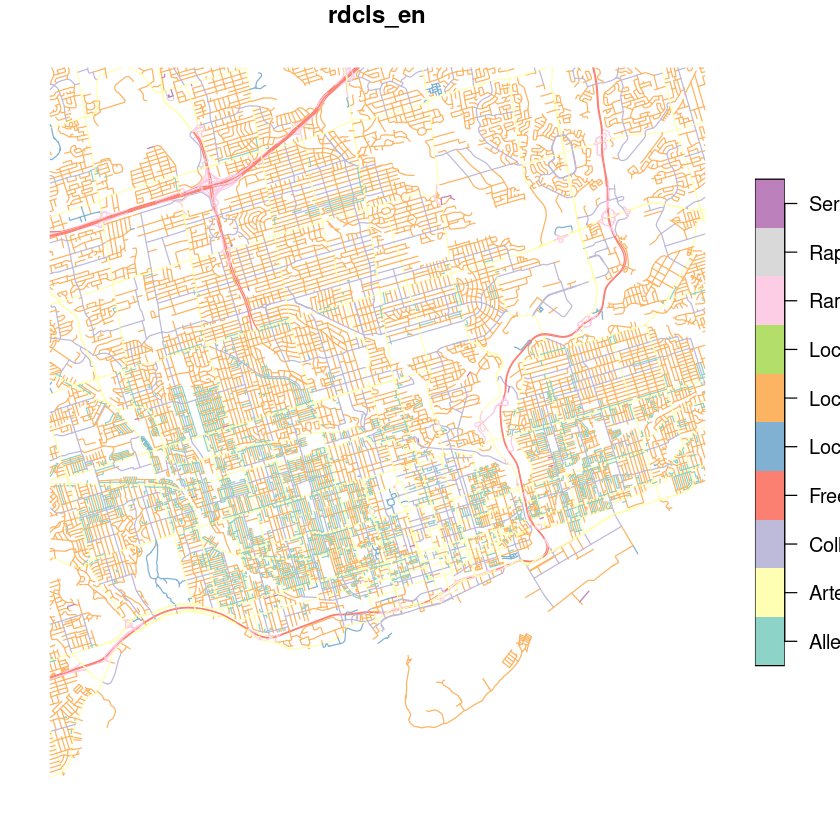

In [5]:
plot(road_segment_1["rdcls_en"])

**Questions:**

- How is this plot different from the previous plot?
- How did the two lines of code differ that produces these plots?

The labels may be cut off, let's print them. With `sort` we tell R to sort the values alphabetically, and with `unique` we tell it to list each value (category) only once.

In [6]:
sort(unique(road_segment_1$"rdcls_en"))

[1] "Alleyway-Lane" "Arterial"      "Collector"     "Freeway"      
 [5] "Local-Strata"  "Local-Street"  "Local-Unknown" "Ramp"         
 [9] "Rapid Transit" "Service Lane"

**Now is your turn!** 

- Please check the content of the folder "canvec"
- Choose another shapefile with transportation data, e.g., railroad tracks, trains stations, or ferries. 
- Insert a cell below this text, make sure the type is "Code".
- Copy-paste and adapt the code above to import the dataset
- Make sure you imported the correct file, and that you wrote it into a new object (not road_segment_1)!
- Plot its geometry.

## 2. Import polygon data into `sf` object

### a) Import file

Let's import the follwoing shapefile:

- waterbody_2: this contains water bodies (i.e., lakes) and water courses (i.e., rivers)

In [7]:
waterbody_2 <- sf::st_read("canvec", layer="waterbody_2")

Reading layer `waterbody_2' from data source `/home/wagnerh1/canvec' using driver `ESRI Shapefile'
Simple feature collection with 80 features and 44 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -79.49682 ymin: 43.5993 xmax: -79.3015 ymax: 43.75543
Geodetic CRS:  GCS_North_American_1983_CSRS98


**Questions**: 

- How many elements (lakes or rivers) does the dataset contain? What does R call them here?
- How many attribute variables? What does R call them here?

### b) Calculate a new attribute variable: area 

In [8]:
names(waterbody_2)

[1] "feature_id" "datemin"    "datemax"    "haccmin"    "haccmax"   
 [6] "perm"       "perm_en"    "perm_fr"    "shorlev"    "shorlev_en"
[11] "shorlev_fr" "definit"    "definit_en" "definit_fr" "isisol"    
[16] "isisol_en"  "isisol_fr"  "name_db"    "name_id"    "name_en"   
[21] "name_fr"    "nameoth"    "langoth"    "namelk1id"  "namelk1en" 
[26] "namelk1fr"  "namelk2id"  "namelk2en"  "namelk2fr"  "namerv1id" 
[31] "namerv1en"  "namerv1fr"  "namerv2id"  "namerv2en"  "namerv2fr" 
[36] "map_sel"    "map_sel_en" "map_sel_fr" "ctry"       "ctry_en"   
[41] "ctry_fr"    "topolqu"    "topolqu_en" "topolqu_fr" "geometry"

There seems to be no column for area. Let's calculate it: 

- We create a new attribute `area`
- We fill it with values that we calculate with the function `st_area` of the package `sf`. 


In [9]:
waterbody_2$area <- sf::st_area(waterbody_2)
waterbody_2$area

Units: [m^2]
 [1] 2.976909e+04 5.857889e+01 6.371544e+03 3.847896e+00 8.204197e+02
 [6] 1.826116e+03 4.471197e+03 2.058471e+03 9.639479e+03 8.045916e+02
[11] 8.394877e+03 6.096998e+02 2.243244e+03 1.495774e+03 4.893504e+02
[16] 9.719515e+03 7.193423e+03 9.896570e+03 2.227254e+03 1.242656e+03
[21] 7.477282e+03 1.167854e+03 1.410092e+03 3.801928e+02 1.962064e+03
[26] 2.079445e+04 3.141813e+03 2.324553e+03 3.692504e+03 2.678700e+02
[31] 3.334019e+01 9.112228e+01 1.112435e+03 1.233908e+02 4.061807e+03
[36] 2.779291e+03 2.754563e+02 2.710707e+02 1.921015e+02 3.225762e+03
[41] 1.993903e+02 2.524421e+02 2.267176e+03 2.036917e+03 5.955689e+01
[46] 4.053524e+03 6.836932e+03 4.704162e+02 2.366845e+03 1.147064e+03
[51] 6.238273e+03 3.219771e+04 2.497354e+03 2.345572e+02 2.736999e+04
[56] 8.577472e+01 2.440412e+03 6.845896e+03 3.002638e+01 1.319900e+03
[61] 4.398075e+02 1.892322e+05 1.989061e+03 2.773327e+03 3.026599e+03
[66] 2.858604e+03 3.526937e+03 9.295631e+01 3.994444e+02 3.553478e+03
[71] 2.

### c) Plot lakes and rivers

Let's plot the water bodies in dark blue and the water course and shorelines (i.e., all lines in the dataset) in sky blue.

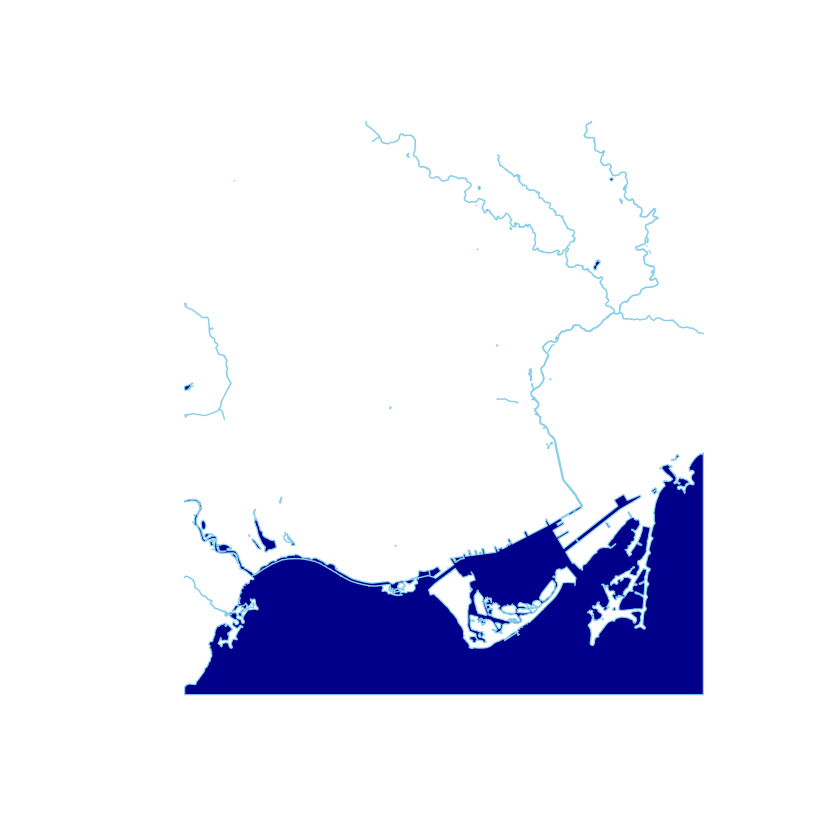

In [10]:
plot(sf::st_geometry(waterbody_2), col="darkblue", border="skyblue")

**Challenge:** How many km^2 (square km) is the area of the largest water body in the study area?

- Here is some pseudocode that you can adapt: `max(MyData$MyVariable) / 10^2`. This would find the maximum of `MyVariable` in the object `MyData` and divide it by 10 to the power of 2. 
- Create your code in the empty cell below.
- Get the maximum value for lake area.
- Divide by an appropriate number to convert from m^2 to km^2

Important for the interpretation:

- All waterbodies will be cropped at the map boundary, as you can see in the plot. Hence some lakes may be larger in reality than the area calculated here. 
- We manually calculated km^2, but R does not know that, it still tells us that this is m^2 as this is based on the units of the `sf` object.

## 3. Create lines from points

### a) Import point data and change projection

We saved the `sf` object with the point data as an `.rds` file in the folder `output`. Let's read it in (if it is still there, otherwise please upload it to the JupyterHub).

Change the file name to match your own point dataset.

In [11]:
MyPoints <- readRDS("output/MyPoints.rds")
print(MyPoints)

Simple feature collection with 7 features and 2 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -79.43622 ymin: 43.61632 xmax: -79.35694 ymax: 43.68094
Geodetic CRS:  WGS 84
   ID             Label                   geometry
1 Pt1      Intersection  POINT (-79.35694 43.6311)
2 Pt2      Transit stop  POINT (-79.3578 43.63144)
3 Pt3       Hospital ER POINT (-79.38647 43.65865)
4 Pt4          Pharmacy POINT (-79.38015 43.64162)
5 Pt5 Elementary school POINT (-79.37857 43.61632)
6 Pt6       High school POINT (-79.43622 43.68094)
7 Pt7  Services Ontario POINT (-79.37695 43.65023)


These data were stored with a different projection (see "Geodetic CRS" in the summary description).

However, because the projection (i.e., the coordinate system, CRS) has been defined for both datasets (the point data and our vector data from CanVec), it is easy to transform the projection of the point data to match that of the CanVec data. 

The key point to remember is that we can't just assign the R object a different CRS. We first need to tell R in what coordinate system the data were stored, and then, in a separate step, we can transform the coordinates to a different CRS. Here, R already knows the current CRS, so we can go ahead and transform.

We use the function `st_transform` of the package `sf` to transform the CRS of the object `MyPoints` from its current CRS to the CRS of the object `road_segment_1`, which we read in with the function `st_crs` of the package `sf`. 

In [12]:
MyPoints.sf <- sf::st_transform(MyPoints, crs = sf::st_crs(road_segment_1))

### b) Create lines

Our goal here is to create a lines dataset "MyLines" with straight lines from the nearest intersection (Pt1) to each public service location. This is surprisingly complex.

Let's first create a single line, from Pt1 to Pt2:

- We plot all points, just for checking.
- We use the function `st_combine` from package `sf` to extract from `MyPoints.sf` the first two rows `[c(1,2),]` and write them into an object `pair`.
- With the function st_cast of the sf package, we tell R to convert the sequence of points to a linestring, i.e., a line that is defined by two or more sets of coordinates.
- Now we can plot the geometry of the line object.
- Modify the code to create and draw a line between a different pair of points. 
- You could also try changing the line color.

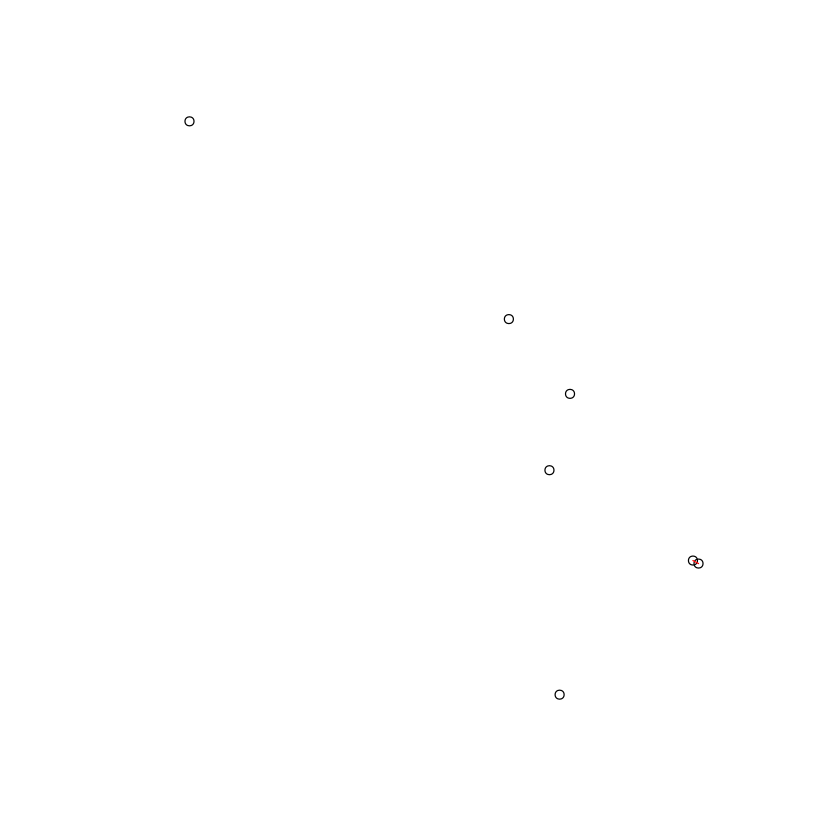

In [13]:
plot(sf::st_geometry(MyPoints.sf))
pair <- sf::st_combine(MyPoints.sf[c(1,2),])
line <- st_cast(pair, "LINESTRING")
plot(line, add=TRUE, col="red")

Now we'll loop through all points (starting with Pt2) to create lines from Pt1 to all other points.

- We start by defining linestrings as an empty list
- We loop through all points=rows in MyPoints.sf, starting with the second one, using i as an indicator for the row number.
- For each point, we extract the `pair` and convert to a `LINESTRING` object with name `line`
- We write the object `line` into the position `i-1` of the list `linestrings`
- Then we merge the list of LINESTRING objects into a single, MULTILINESTRING object with name "MyLines.sf". The main function for this is multilinestring (package sf), but we need to do a bit of magic first to bind the list elements together as rows in a dataset, calling the function rbind. 
- This kind of stuff is where worked examples from the internet are really helfpul! The code is adapted from here: https://gis.stackexchange.com/questions/270725/r-sf-package-points-to-multiple-lines-with-st-cast/270814

In [14]:
linestrings <- list()

for(i in 2:nrow(MyPoints.sf))
{
  pair <- st_combine(MyPoints.sf[c(1,i),])
  line <- st_cast(pair, "LINESTRING")
  linestrings[[i-1]] <- line
}

MyLines.sf <- sf::st_multilinestring(do.call("rbind", linestrings))

## 4. Plot all on the same map

Ignore a possible warning about "ignoring all but the first attribute".

Feel free to change some of the settings:

- col: colour
- border: line colour for polygons
- lwd: line width
- cex: character expansion, i.e., size of point symbols
- pch: point character, i.e., shape of point symbols (see: http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r)

Note: last week we defined the extent in an object Bbox, but we did not export it. Let's create it again here, export it, then import it again so that we can tell R what map extent we want to plot.

In [15]:
Bbox <- sf::st_bbox(MyPoints.sf)
xrange <- Bbox$xmax - Bbox$xmin # range of x values
yrange <- Bbox$ymax - Bbox$ymin # range of y values

Bbox[1] <- Bbox[1] - (0.5 * xrange) # xmin - left
Bbox[3] <- Bbox[3] + (0.5 * xrange) # xmax - right
Bbox[2] <- Bbox[2] - (0.5 * yrange) # ymin - bottom
Bbox[4] <- Bbox[4] + (0.5 * yrange) # ymax - top

names(Bbox) <- c("left",   "bottom", "right",  "top")
saveRDS(Bbox, "output/Bbox.rds")

Warning message in plot.sf(MyPoints.sf, col = "red", cex = 2, pch = 16, add = TRUE):
“ignoring all but the first attribute”


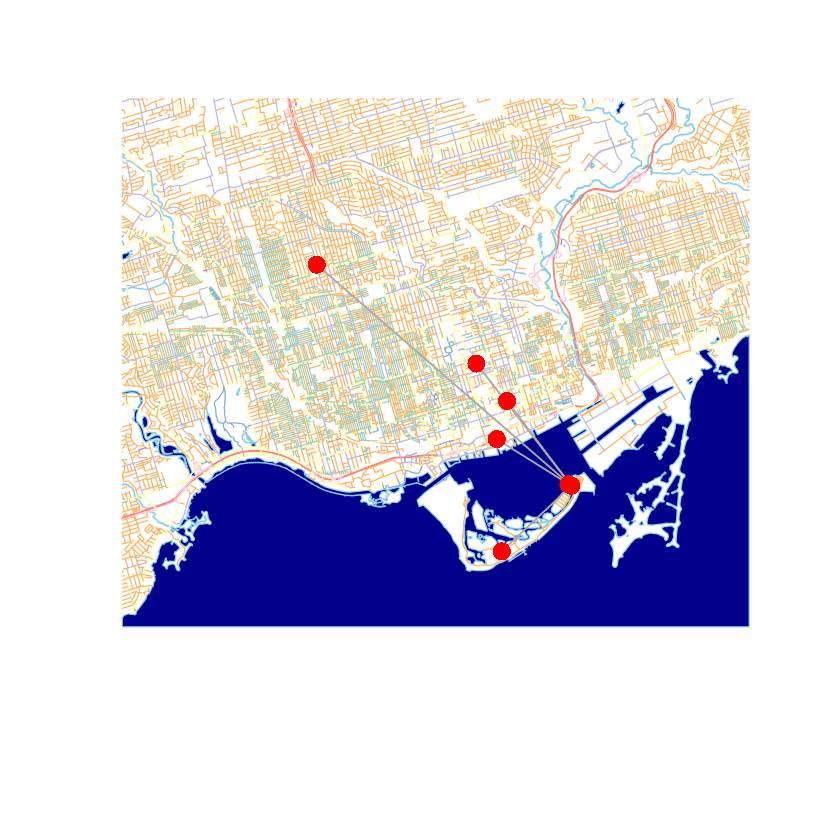

In [16]:
Bbox <- readRDS("output/Bbox.rds")
plot(sf::st_geometry(waterbody_2), col="darkblue", border="skyblue",
    extent=Bbox)
plot(road_segment_1["rdcls_en"], add=TRUE)
plot(MyLines.sf, col="darkgrey", lwd=1.5, add=TRUE)
plot(MyPoints.sf, col="red", cex=2, pch=16, add=TRUE)

This time we used the basic R plot function for plotting. To export the plot as a pdf file, we have:

- Create a connection to a new pdf file, using the function `pdf`
- Execute all line of the plot again
- Close the connection with 'dev.off(). 

In [17]:
pdf(file="output/MyLinesMap.pdf")

plot(sf::st_geometry(waterbody_2), col="darkblue", border="skyblue")
plot(road_segment_1["rdcls_en"], add=TRUE)
plot(MyLines.sf, col="darkgrey", lwd=1.5, add=TRUE)
plot(MyPoints.sf, col="red", cex=2, pch=16, add=TRUE)

dev.off()

Warning message in plot.sf(MyPoints.sf, col = "red", cex = 2, pch = 16, add = TRUE):
“ignoring all but the first attribute”


png 
  2

## 5. Save data and prepare for next lab

Let's save our spatial data by writing them into the folder `output` as `.rds` files!

In [18]:
saveRDS(MyPoints.sf, "output/MyPoints.sf.rds")
saveRDS(MyLines.sf, "output/MyLines.sf.rds")
saveRDS(waterbody_2, "output/waterbody_2.rds")
saveRDS(road_segment_1, "output/road_segment_1.rds")

For next week, we'll need to extract land cover data from a national raster file with 30 m resolution (a huge file!).

We want to make sure that this does not overwhelm the system, both for your local machine and for JupyterHub. Therefore, as part of today's Lab Quiz, you will be asked to copy-paste the values from your object `Bbox` into the Quercus quiz. 

Note: it is not enough to submit the .rds file because we could only read it by importing into R. This is technically possible but not a preferred way of sharing files. 

- Use the code line below to find print the object boundary `Bbox`
- Copy-past the output into the homework quiz (please copy-paste, don't use a screenshot, otherwise we'll have to type in all numbers again). 
- Thanks!

In [19]:
print(Bbox)

     left    bottom     right       top 
-79.47587  43.58401 -79.31729  43.71325 
